# Principi di statistica e tools digitali

## 3a: Statistiche con Pandas

### GG Analisi dei dati @ Fidia

**Speaker**: David Leoni info@davidleoni.it

Repository github per questi tutorial: https://github.com/DavidLeoni/ggad

Materiale tratto dal libro [SoftPython](https://it.softpython.org)

(Per navigare nelle slide premi Esc)

## Scaletta

3b - statistiche con Pandas

- istogrammi
- moda
- media
- varianza
- mediana
- quartili


## File d'esempio

Carichiamo il file [ortofrutta.csv](ortofrutta.csv) - Ciascuna riga rappresenta un cliente con

- dove vive
- la sua età
- confezioni di marmellata compratate finora

In [159]:
import pandas as pd

df = pd.read_csv('ortofrutta.csv', encoding='utf-8')
df.head()

,città,età,confezioni
0,Padova,53,11
1,Padova,39,2
2,Roma,36,2
3,Trento,52,1
4,Roma,33,3


In [160]:
df.info(memory_usage="deep")  # così mostra il vero utilizzo di memoria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   città       1000 non-null   object
 1   età         1000 non-null   int64 
 2   confezioni  1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 76.8 KB


In [161]:
df.describe()

,età,confezioni
count,1000.000000,1000.000000
mean,49.307000,5.290000
std,9.581783,9.866775
min,22.000000,1.000000
25%,43.000000,1.000000
50%,49.000000,2.000000
75%,56.000000,5.000000
max,88.000000,134.000000


## Istogrammi

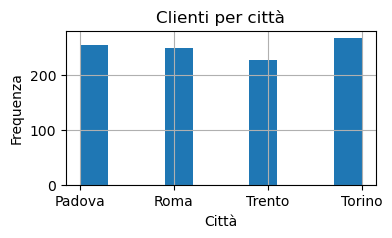

In [162]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(4,2))
plt.title('Clienti per città')
plt.xlabel('Città')
plt.ylabel('Frequenza')
df['città'].hist()
plt.show()

## bar plot

`.hist()` Purtroppo genera grafici non facilissimi da controllare (es etichette non centrate)

Alternativa con `groupby` e `plot.bar`:

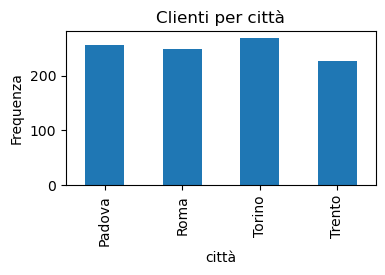

In [163]:
plt.figure(figsize=(4,2))
plt.title('Clienti per città')
plt.xlabel('Città')
plt.ylabel('Frequenza')
df.groupby('città').size().plot.bar()
plt.show()

## Com'è fatto `groupby` ?

In [164]:

df.groupby('città')

In [165]:

df.groupby('città').size()

città
Padova    256
Roma      249
Torino    268
Trento    227
dtype: int64

## Aggregare sommando

### Quante confezioni sono vendute per città?

In [166]:
df.groupby('città')['confezioni'].sum()


città
Padova    1238
Roma      1381
Torino    1438
Trento    1233
Name: confezioni, dtype: int64

In [167]:
type(df.groupby('città')['confezioni'].sum())

pandas.core.series.Series

Per trasformare in un vero dataframe e cambiare il nome della colonna, usare `.reset_index`

In [168]:
cdf = df.groupby('città')['confezioni'].sum().reset_index(name='totale_confezioni')
cdf

,città,totale_confezioni
0,Padova,1238
1,Roma,1381
2,Torino,1438
3,Trento,1233


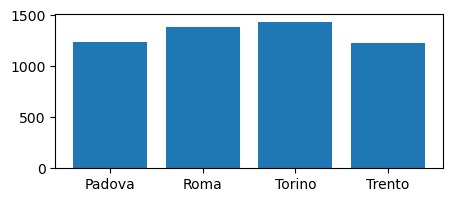

In [169]:
plt.figure(figsize=(5,2))
plt.bar(cdf['città'], cdf['totale_confezioni'])
plt.show()

## Moda

La moda è il valore più frequente in una distribuzione

Per esempio, la città con più clienti è....

In [170]:
df['città'].mode()

0    Torino
Name: città, dtype: object

In [171]:
type(df['città'].mode())

pandas.core.series.Series

Estraiamo la stringa

In [172]:
df['città'].mode()[0]  

'Torino'

## Variabili numeriche

Per statistiche come media, mediana, varianza etc serviranno variabili numeriche

Per es:

In [173]:
df['età']

0      53
1      39
2      36
3      52
4      33
       ..
995    33
996    46
997    41
998    49
999    45
Name: età, Length: 1000, dtype: int64

In [174]:
eg = df.groupby(['età']).size()
eg[:7]

età
22    1
23    1
24    2
26    1
27    5
28    4
29    4
dtype: int64

In [175]:
edf = eg.reset_index(name='frequenza')
edf[:7]

,età,frequenza
0,22,1
1,23,1
2,24,2
3,26,1
4,27,5
5,28,4
6,29,4


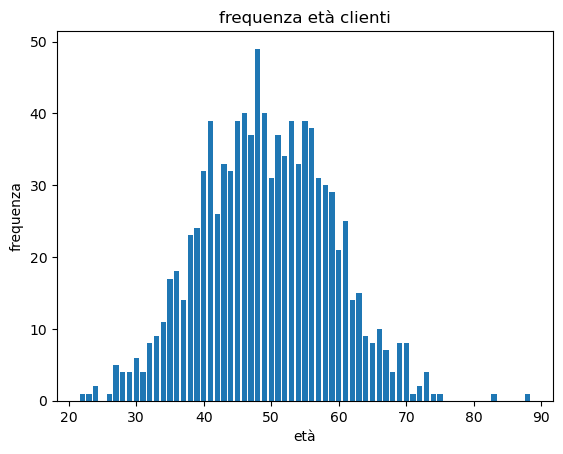

In [176]:
plt.title('frequenza età clienti')
plt.xlabel('età')
plt.ylabel('frequenza')

plt.bar(edf['età'], edf['frequenza'])
plt.show()

## Intervalli

Spesso con variabili numeriche si vuole dividere in intervalli

Per trovare a quale intervallo di `10` anni di età appartiene ciascuna persona, usiamo [pd.cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) :

In [177]:
intervalli = pd.cut(df["età"], np.arange(20, 100, 10), right=False)  # con right=False includiamo estremi sinistri ed escludiamo i destri

In [178]:
intervalli

0      [50, 60)
1      [30, 40)
2      [30, 40)
3      [50, 60)
4      [30, 40)
         ...   
995    [30, 40)
996    [40, 50)
997    [40, 50)
998    [40, 50)
999    [40, 50)
Name: età, Length: 1000, dtype: category
Categories (7, interval[int64, left]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

In [179]:
gi = df.groupby(intervalli).size()
gi

età
[20, 30)     18
[30, 40)    134
[40, 50)    367
[50, 60)    341
[60, 70)    121
[70, 80)     17
[80, 90)      2
dtype: int64

In [180]:
gidf = gi.reset_index(name='frequenza')
# plot si rifiuterà di stampare oggetti Interval, convertiamo manualmente a stringa con transform
gidf['età'] = gidf['età'].transform(lambda x : str(x))
gidf

,età,frequenza
0,"[20, 30)",18
1,"[30, 40)",134
2,"[40, 50)",367
3,"[50, 60)",341
4,"[60, 70)",121
5,"[70, 80)",17
6,"[80, 90)",2


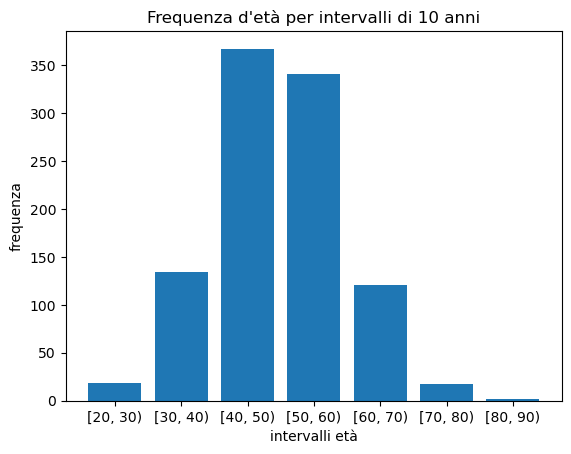

In [181]:
plt.title("Frequenza d'età per intervalli di 10 anni")
plt.xlabel("intervalli età")
plt.ylabel('frequenza')
plt.bar(gidf['età'], gidf['frequenza'])
plt.show()

## Valore atteso

* Variabile casuale $X$
* valori $x$ in dominio $D$
* $\mu = E[X] = \sum_{x\in D}P(x) \: x$

* **Es.** Variabile casuale $X$: _età_
* dominio $D$: 0-120
* $N=1000$ clienti (assumiamoli tutti diversi)
$$
\begin{align}
\mu = E[X] 
& = \sum_{x\in D} P(x)\:x                 \\
& =\sum_{x\in D} \frac{f(x)}{N} \: x        \\
& = \frac{1}{N}\sum_{x\in (D)} f(x) \:  x   \\
& = \frac{1}{1000}\sum_{\text{età}\in (0-120)} f(\text{età}) \: \text{età}
\end{align}
$$


Conto veloce:

In [182]:
df['età'].mean()

49.307

Verifichiamo facendo un conteggio manuale.

Prima raggruppiamo:

In [183]:
g = df.groupby(['età']).size()
g[:10]

età
22    1
23    1
24    2
26    1
27    5
28    4
29    4
30    6
31    4
32    8
dtype: int64

Per comodità trasformiamo la `Series` in un `Dataframe`:

In [184]:
gdf = g.reset_index(name='frequenza')   #ci serve rinominare altrimenti lamenta nomi duplicati
gdf[:7]

,età,frequenza
0,22,1
1,23,1
2,24,2
3,26,1
4,27,5
5,28,4
6,29,4


Applichiamo la formula del valore atteso a variabile casuale $X$: _età_

* dominio $D$: 0-120
* $N=1000$ clienti 

$$
\begin{align}
\mu = E[X] 
& = \sum_{x\in D} P(x) \: x                 \\
& =\sum_{x\in D} \frac{f(x)}{N} \: x        \\
& = \frac{1}{N}\sum_{x\in (D)} f(x) \: x  \\
& = \frac{1}{1000}\sum_{\text{età}\in (0-120)} f(\text{età}) \: \text{età}
\end{align}
$$

In [185]:
(gdf['età'] * gdf['frequenza']).sum()/1000

49.307

In [186]:
df['età'].mean()    # confermiamo

49.307

## Varianza

simbolo: $\sigma^2$

unità di misura: unità di misura variabile $X$ al quadrato

$Var[X] \geq 0$

$Var[X] = E[(X-\mu)^2] = \sum_{x\in D}(x-E[x])^2 P(x)$

## Deviazione standard

* simbolo: $\sigma$ 
* radice quadrata della varianza
* unità di misura: unità di misura variabile $X$

<img width="35%" src="img/standard-deviation.png">


Assumendo che la distribuzione sia gaussiana di parametri $\mu, \sigma$, il 68% dei valori è compreso tra $\mu - 1 \sigma$ e $\mu + 1 \sigma$

Fonte immagine: [Wikipedia](https://en.wikipedia.org/wiki/Standard_deviation)

In [187]:
df['età'].var()

91.81056156156171

In [188]:
df['età'].std()

9.581782796617846

In parole: 

In [189]:
print(f"Assumendo che la distribuzione sia gaussiana di parametri μ={df['età'].mean():.2f} e σ={df['età'].std():.2f},")
print(f"il 68% dei clienti ha età compreso tra {df['età'].mean() - df['età'].std():.2f} e {df['età'].mean() + df['età'].std():.2f}")

Assumendo che la distribuzione sia gaussiana di parametri μ=49.31 e σ=9.58,
il 68% dei clienti ha età compreso tra 39.73 e 58.89


**SFIDA**: Prova a calcolare la varianza manualmente applicando la definizione e confronta coi valori di seguito

**NOTA**: potrebbero venir fuori valori leggermente diversi a causa di errori di arrotondamento


## Mediana

La mediana è il valore rispetto al quale il 50% della popolazione ha un valore inferiore e il 50% ha un valore superiore.

Formalmente, se la mediana è $m$: $P(X < m) = \frac{1}{2}$ 

E' detta anche quantile di ordine 1/2  

In [190]:
df['età'].median()

49.0

In [191]:
df['età'].mean()

49.307

Visto che la distribuzione della variabile `età` è gaussiana, moda e mediana risultano molto simili 

Proviamo la variabile `confezioni`:

In [192]:
df['confezioni'].median()

2.0

In [193]:
df['confezioni'].mean()

5.29

In [194]:
df['confezioni'].max()

134

Qua la differenza è più marcata, probabilmente abbiamo un altro tipo di distribuzione. Verifichiamo.

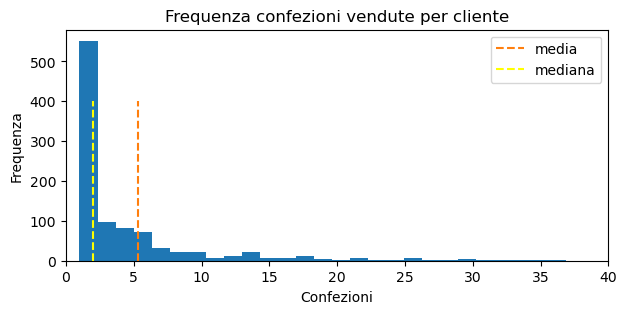

In [195]:
plt.figure(figsize=(7,3))
plt.title('Frequenza confezioni vendute per cliente')
plt.xlabel('Confezioni')
plt.ylabel('Frequenza')
plt.xlim(0,40)
plt.hist(df['confezioni'], bins=100)  # dividiamo in 100 intervalli
mediana =  df['confezioni'].median() # aggiungiamo linee per mediana e media
media = df['confezioni'].mean()
# coordinate x1,x2 e y1,y2 per disegnare una singola linea tratteggiata
plt.plot([media,media], [0,400], '--', label='media')  
plt.plot([mediana,mediana], [0,400], '--', label='mediana', color='yellow')
plt.legend()
plt.show()

Questa distribuzione non è gaussiana...

## Quartili

I quartili ripartiscono la popolazione in quarti. 

La mediana che abbiamo già visto è il quartile di mezzo. 

Il primo quartile è il valore per cui il 25% della popolazione ha un valore inferiore e il 75% ha un valore superiori. 

Il terzo quartile è il valore per cui il 75% della popolazione ha un valore inferiore e il 25% ha un valore superiore. 

I quartili sono detti quantili di ordine 1/4, 2/4 o 3/4 (nota la _n_)

**SFIDA**: Prova ad aggiungere al grafico precedente le linee tratteggiate del primo e terzo quartile - usa la funzione [quantile](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) 

![expected-quantiles.png](img/expected-quantiles.png)